# Dose response curves with error bands

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
df = (
    pd.read_csv("https://gist.githubusercontent.com/Swarchal/f853a013cb5c055343b3c0efbf0b79ba/raw/8768cc544d80c0314ab710151b3d16a5801bb346/conc_response.csv")
    .dropna()
)
df.head()

df["log_conc"] = np.log10(df["conc"])
df.head()

,conc,response,drug,log_conc
0,1.000000e-10,0.0,A,-10.000000
1,1.000000e-08,1.0,A,-8.000000
2,3.000000e-08,12.0,A,-7.522879
3,1.000000e-07,19.0,A,-7.000000
4,3.000000e-07,28.0,A,-6.522879


In [3]:
def hill_4_param(
    x: np.ndarray, top: float, bottom: float, log_ec50: float, hillslope: float = 1.0
) -> np.ndarray:
    return bottom + (top - bottom) / (1 + 10**((log_ec50 - x) * hillslope))

A [ 4.19349221e+01  2.57452483e-15 -6.91466067e+00  8.00518897e-01]
B [ 3.47866873e+01  1.81490941e-14 -6.15343656e+00  1.02689841e+00]


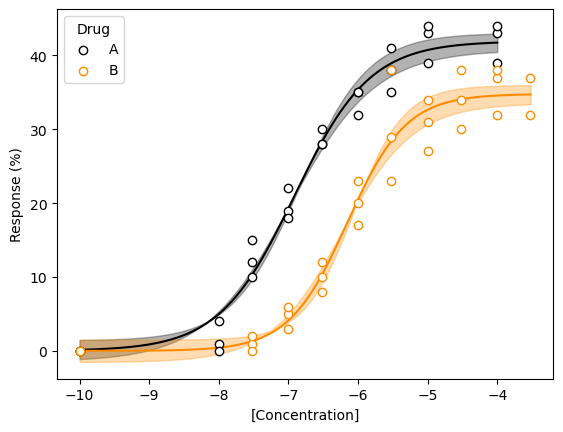

In [4]:
for drug, color in (("A", "black"), ("B", "darkorange")):
    df_drug = df[df["drug"] == drug]
    bounds = ((0, 0, -10, 0), (100, 100, 0, 2))
    p0 = (50, 0, -5, 1)
    popt, pcov = curve_fit(hill_4_param, df_drug["log_conc"], df_drug["response"], bounds=bounds, p0=p0)
    p_sigma = np.sqrt(np.diag(pcov))
    x = np.linspace(df_drug["log_conc"].min(), df_drug["log_conc"].max(), 1000)
    yhat = hill_4_param(x, *popt)
    yhat_low = hill_4_param(x, *(popt - p_sigma))
    yhat_upp = hill_4_param(x, *(popt + p_sigma))
    plt.plot(x, yhat, color=color)
    plt.fill_between(x, y1=yhat_low, y2=yhat_upp, color=color, alpha=0.3)
    plt.scatter(
        df_drug["log_conc"], df_drug["response"],
        marker="o", facecolor="white", color=color, zorder=99, label=drug
    )
    print(drug, popt)
plt.xlabel("[Concentration]")
plt.ylabel("Response (%)")
plt.legend(title="Drug")
plt.show()